In [36]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# TP1 - Panorámica

In [37]:
import cv2
import matplotlib.pyplot as plt

from utils2 import *

## 3.1 - Detección y descripción de características visuales

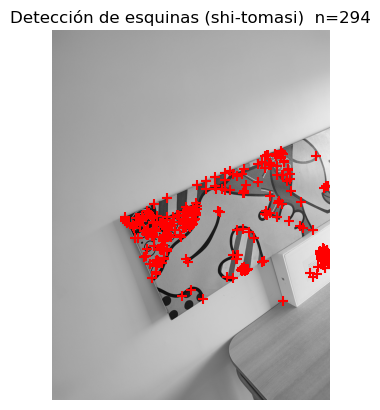

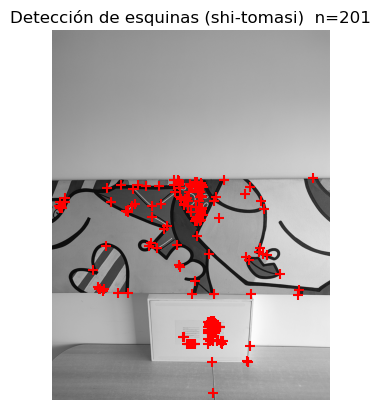

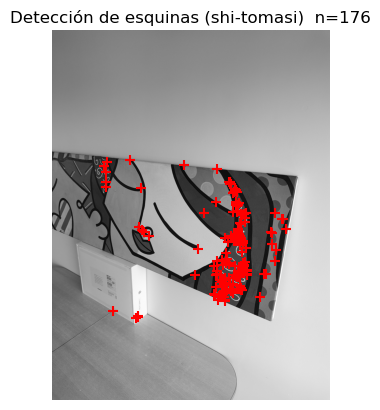

In [3]:
pathsC = ["img/cuadro_0.jpg", "img/cuadro_1.jpg", "img/cuadro_2.jpg"]
corners_storeCS = {}  

for path in pathsC:
    img = cv2.imread(path)
    plot_corners(img, method='shi-tomasi', maxCorners=2000, qualityLevel=0.2, minDistance=8)

    coordsCS, responsesCS, kpsCS = find_corners(img, method='shi-tomasi',
                                          maxCorners=2000, qualityLevel=0.2, minDistance=8)
    corners_storeCS[path] = {"img": img, "coords": coordsCS, "responses": responsesCS, "kps": kpsCS}


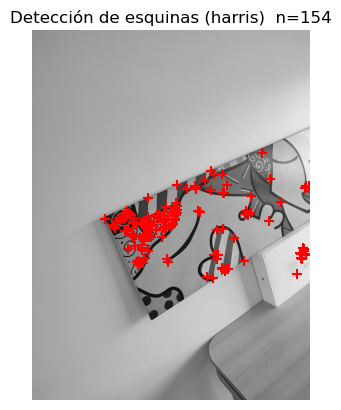

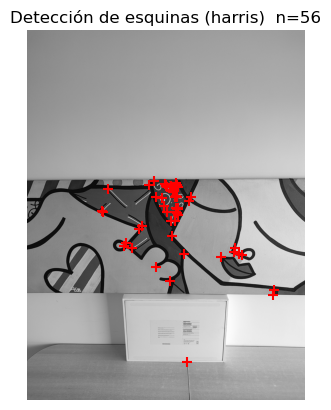

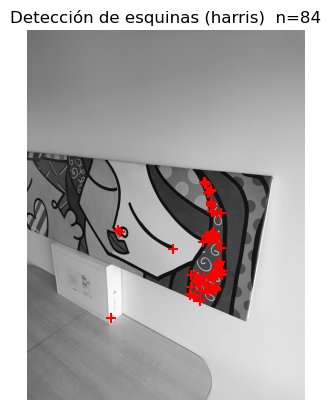

In [4]:
pathsC = ["img/cuadro_0.jpg", "img/cuadro_1.jpg", "img/cuadro_2.jpg"]
corners_storeCH = {}  

for path in pathsC:
    img = cv2.imread(path)
    plot_corners(img, method='harris', maxCorners=2000, qualityLevel=0.2, minDistance=8)

    coordsCH, responsesCH, kpsCH = find_corners(img, method='harris',
                                          maxCorners=2000, qualityLevel=0.2, minDistance=8)
    corners_storeCH[path] = {"img": img, "coords": coordsCH, "responses": responsesCH, "kps": kpsCH}


Imagen: img/cuadro_0.jpg
SIFT: 4154 keypoints, descriptors: (4154, 128)


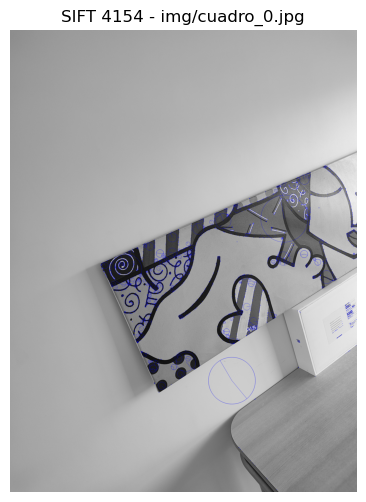


Imagen: img/cuadro_1.jpg
SIFT: 3424 keypoints, descriptors: (3424, 128)


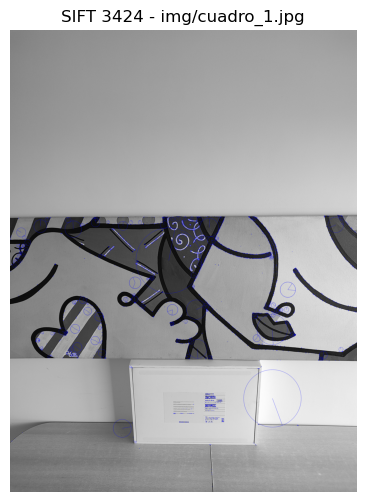


Imagen: img/cuadro_2.jpg
SIFT: 2572 keypoints, descriptors: (2572, 128)


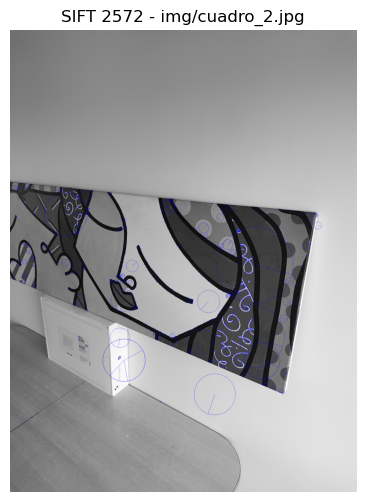

In [27]:
corners_storeCSF = {}

for path in pathsC:
    img = cv2.imread(path)

    coordsCSF, responsesCSF, kpsCSF, descCSF = detect_sift(
        img, nfeatures=8000, contrastThreshold=0.1, edgeThreshold=10, sigma=1.6, mask=None
    )

    print(f"\nImagen: {path}")
    print(f"SIFT: {len(kpsCSF)} keypoints, descriptors: {None if descCSF is None else descCSF.shape}")
    plot_sift_points(img, kpsCSF, title=f"SIFT {len(kpsCSF)} - {path}", color=(255,0,0))

    corners_storeCSF[path] = {
        "img": img,
        "coords": coordsCSF,         
        "responses": responsesCSF,   
        "kps": kpsCSF,               
        "desc": descCSF              
    }

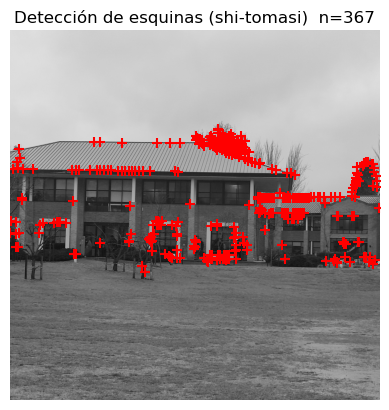

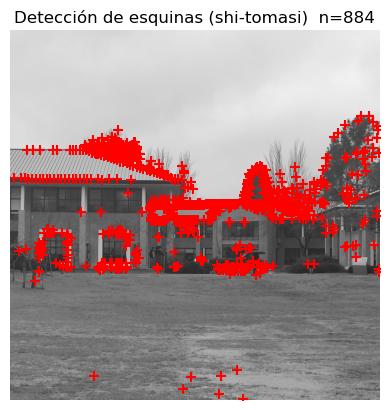

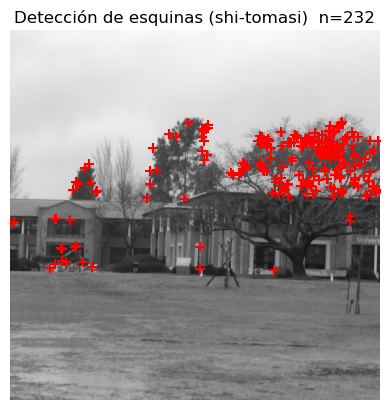

In [6]:
pathsU = ["img/udesa_0.jpg", "img/udesa_1.jpg", "img/udesa_2.jpg"]
corners_storeUS = {}  

for path in pathsU:
    img = cv2.imread(path)
    plot_corners(img, method='shi-tomasi', maxCorners=2000, qualityLevel=0.2, minDistance=8)

    coordsUS, responsesUS, kpsUS = find_corners(img, method='shi-tomasi',
                                          maxCorners=2000, qualityLevel=0.2, minDistance=8)

    corners_storeUS[path] = {"img": img, "coords": coordsUS, "responses": responsesUS, "kps": kpsUS}

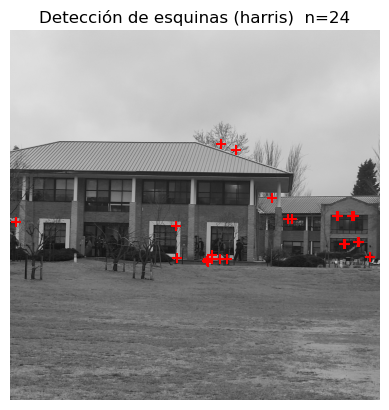

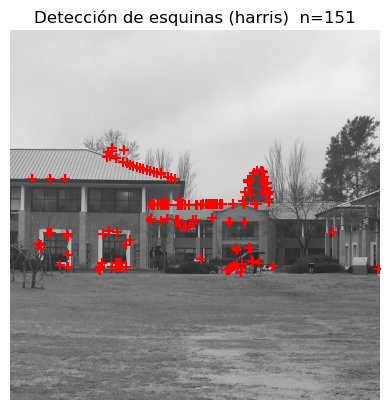

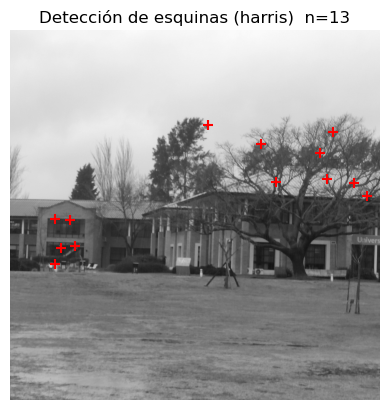

In [7]:
pathsU = ["img/udesa_0.jpg", "img/udesa_1.jpg", "img/udesa_2.jpg"]
corners_storeUH = {}  

for path in pathsU:
    img = cv2.imread(path)
    plot_corners(img, method='harris', maxCorners=2000, qualityLevel=0.2, minDistance=8)

    coordsUH, responsesUH, kpsUH = find_corners(img, method='harris',
                                          maxCorners=2000, qualityLevel=0.2, minDistance=8)

    corners_storeUH[path] = {"img": img, "coords": coordsUH, "responses": responsesUH, "kps": kpsUH}


Imagen: img/udesa_0.jpg
SIFT: 3520 keypoints, descriptors: (3520, 128)


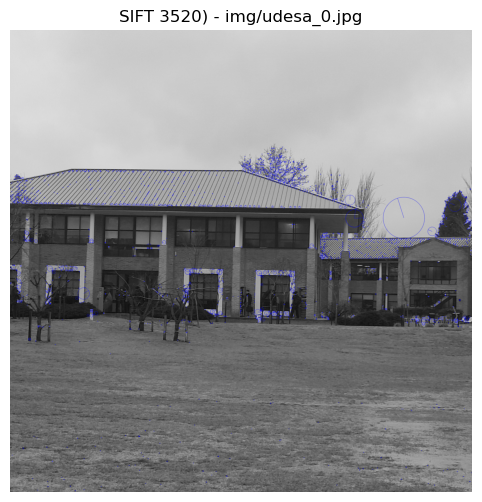


Imagen: img/udesa_1.jpg
SIFT: 2396 keypoints, descriptors: (2396, 128)


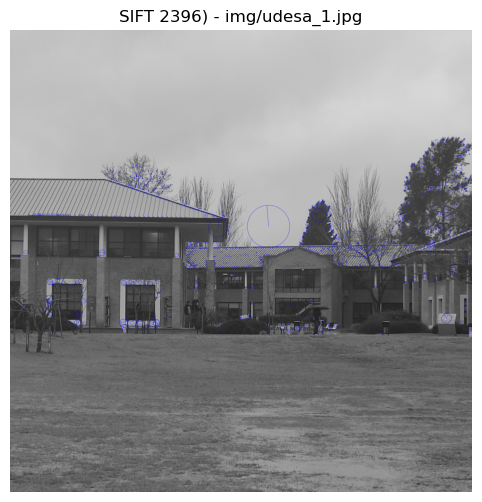


Imagen: img/udesa_2.jpg
SIFT: 297 keypoints, descriptors: (297, 128)


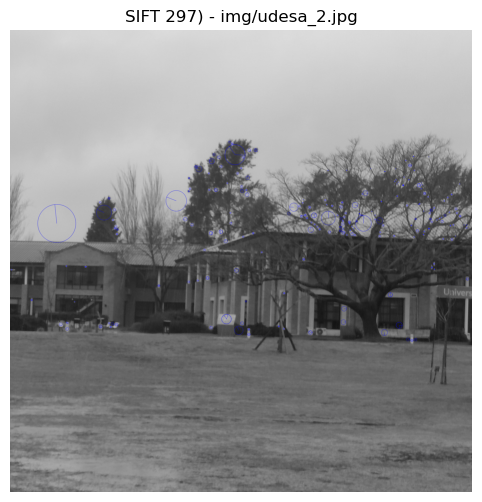

In [ ]:
corners_storeUSF = {}

for path in pathsU:
    img = cv2.imread(path)

    coordsUSF, responsesUSF, kpsUSF, descUSF = detect_sift(
        img, nfeatures=8000, contrastThreshold=0.1, edgeThreshold=10, sigma=1.6, mask=None
    )

    print(f"\nImagen: {path}")
    print(f"SIFT: {len(kpsUSF)} keypoints, descriptors: {None if descUSF is None else descUSF.shape}")
    plot_sift_points(img, kpsUSF, title=f"SIFT {len(kpsUSF)} - {path}", color=(255,0,0))

    corners_storeUSF[path] = {
        "img": img,
        "coords": coordsUSF,         
        "responses": responsesUSF,   
        "kps": kpsUSF,               
        "desc": descUSF              
    }

## 3.2 - Supresión de No Máxima Adaptativa

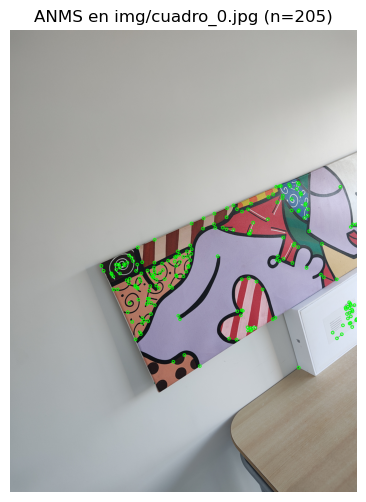

[img/cuadro_0.jpg] antes=294  después(ANMS)=205  (N_target=205)


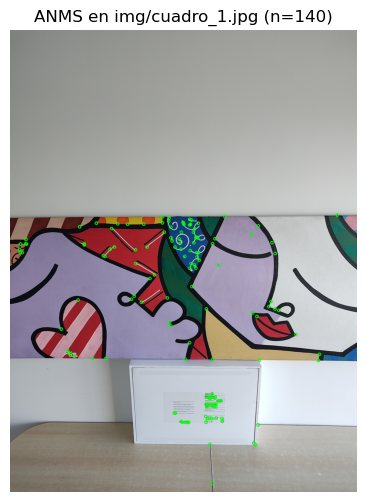

[img/cuadro_1.jpg] antes=201  después(ANMS)=140  (N_target=140)


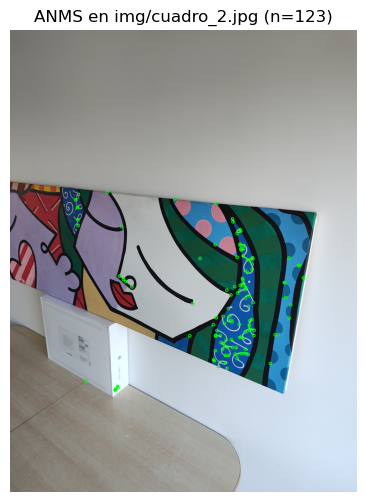

[img/cuadro_2.jpg] antes=176  después(ANMS)=123  (N_target=123)


In [8]:
all_kps_anmsCS = {}
all_desc_anmsCS = {}

for path, data in corners_storeCS.items():
    img       = data["img"]
    coords    = data["coords"]
    responses = data["responses"]

    n0 = len(coords)
    N_target = int(0.7 * len(coords))
    keep_idx, _ = anms_from_coords(coords, responses, N=N_target, strength_ratio=1.2)
    coords_anms = coords[keep_idx]

    show_points_overlay(img, coords_anms, f"ANMS en {path}")
    print(f"[{path}] antes={n0}  después(ANMS)={len(coords_anms)}  (N_target={N_target})")

    kps_anms, desc_anms = describe_orb_on_points(img, coords_anms, nfeatures=2000)
    all_kps_anmsCS[path]  = kps_anms
    all_desc_anmsCS[path] = desc_anms


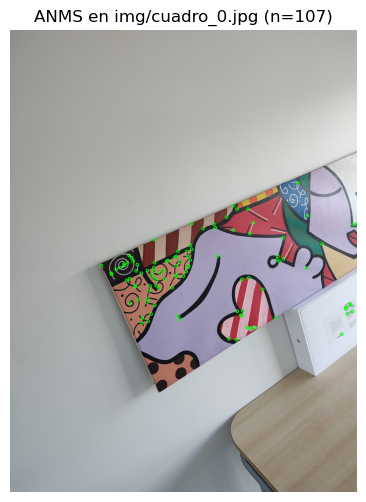

[img/cuadro_0.jpg] antes=154  después(ANMS)=107  (N_target=107)


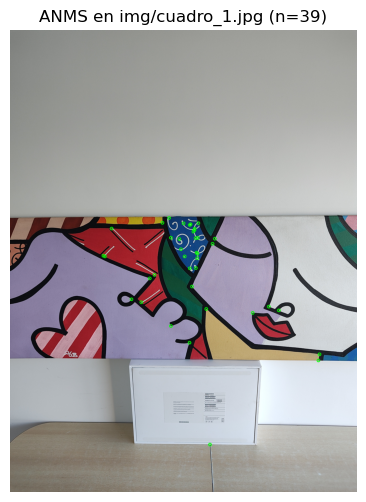

[img/cuadro_1.jpg] antes=56  después(ANMS)=39  (N_target=39)


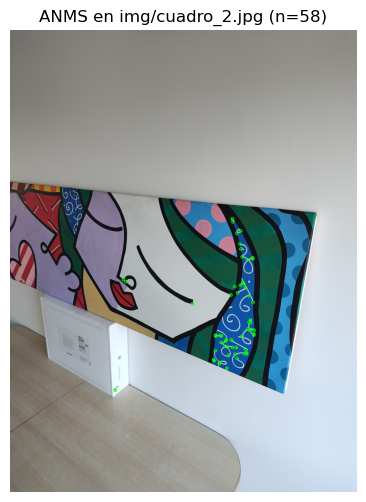

[img/cuadro_2.jpg] antes=84  después(ANMS)=58  (N_target=58)


In [9]:
all_kps_anmsCH = {}
all_desc_anmsCH = {}

for path, data in corners_storeCH.items():
    img       = data["img"]
    coords    = data["coords"]
    responses = data["responses"]

    n0 = len(coords)
    N_target = int(0.7 * len(coords))
    keep_idx, _ = anms_from_coords(coords, responses, N=N_target, strength_ratio=1.2)
    coords_anms = coords[keep_idx]

    show_points_overlay(img, coords_anms, f"ANMS en {path}")
    print(f"[{path}] antes={n0}  después(ANMS)={len(coords_anms)}  (N_target={N_target})")

    kps_anms, desc_anms = describe_orb_on_points(img, coords_anms, nfeatures=2000)
    all_kps_anmsCH[path]  = kps_anms
    all_desc_anmsCH[path] = desc_anms


[img/cuadro_0.jpg] SIFT antes=4154  después(ANMS)=2907  (N_target=2907, c=1.1)  desc=(2907, 128)


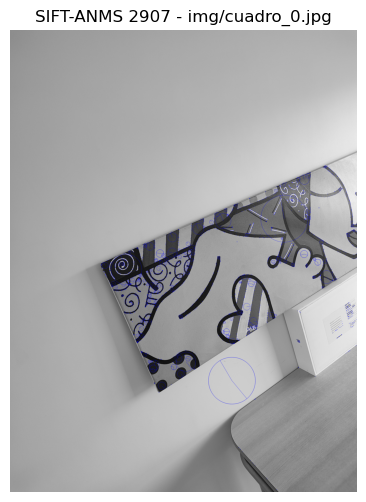

[img/cuadro_1.jpg] SIFT antes=3424  después(ANMS)=2396  (N_target=2396, c=1.1)  desc=(2396, 128)


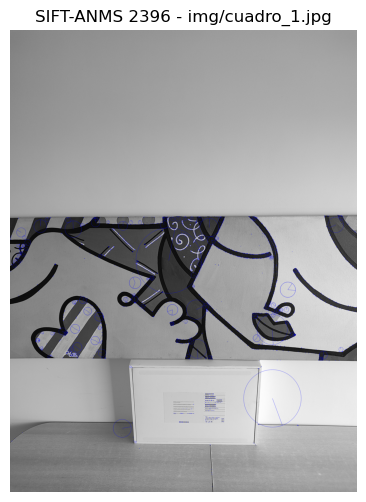

[img/cuadro_2.jpg] SIFT antes=2572  después(ANMS)=1800  (N_target=1800, c=1.1)  desc=(1800, 128)


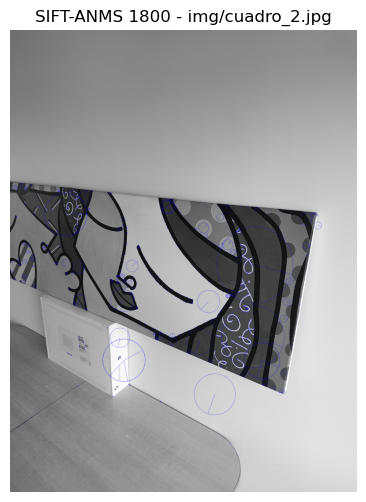

In [39]:
all_kps_anmsCSF, all_desc_anmsCSF = run_anms_sift(
    corners_storeCSF, keep_frac=0.7, min_keep=300, strength_ratio=1.1, show=True
)

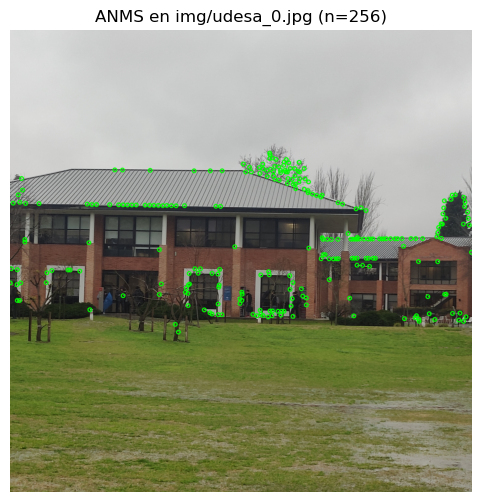

[img/udesa_0.jpg] antes=367  después(ANMS)=256  (N_target=256)


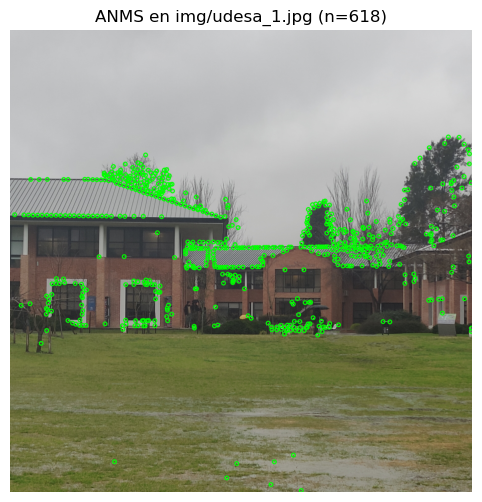

[img/udesa_1.jpg] antes=884  después(ANMS)=618  (N_target=618)


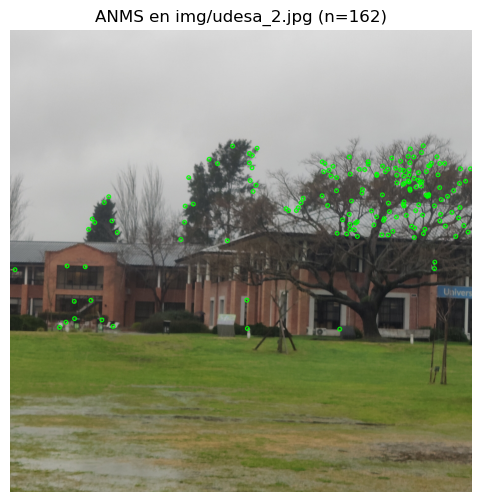

[img/udesa_2.jpg] antes=232  después(ANMS)=162  (N_target=162)


In [10]:
all_kps_anmsUS = {}
all_desc_anmsUS = {}

for path, data in corners_storeUS.items():
    img       = data["img"]
    coords    = data["coords"]
    responses = data["responses"]

    n0 = len(coords)
    N_target = int(0.7 * len(coords)) 
    keep_idx, _ = anms_from_coords(coords, responses, N=N_target, strength_ratio=1.2)
    coords_anms = coords[keep_idx]

    show_points_overlay(img, coords_anms, f"ANMS en {path}")
    print(f"[{path}] antes={n0}  después(ANMS)={len(coords_anms)}  (N_target={N_target})")

    kps_anms, desc_anms = describe_orb_on_points(img, coords_anms, nfeatures=2000)
    all_kps_anmsUS[path]  = kps_anms
    all_desc_anmsUS[path] = desc_anms


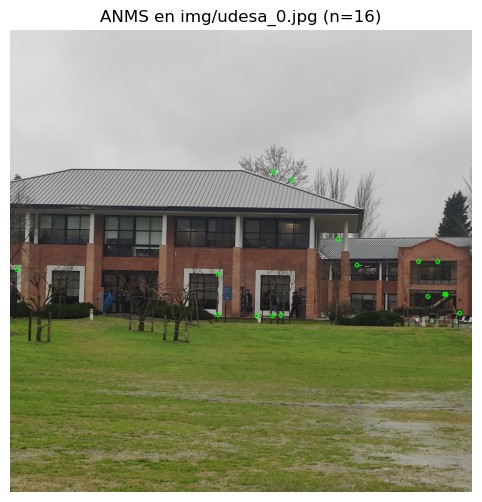

[img/udesa_0.jpg] antes=24  después(ANMS)=16  (N_target=16)


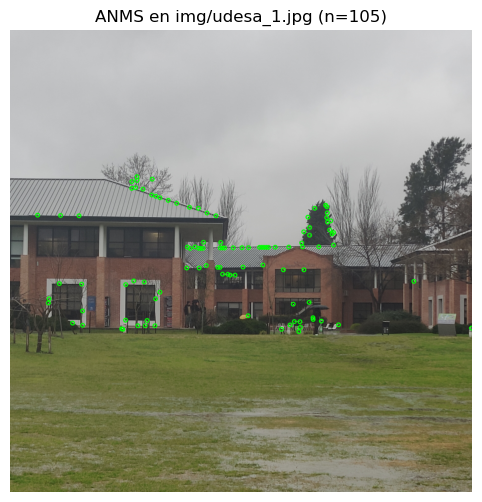

[img/udesa_1.jpg] antes=151  después(ANMS)=105  (N_target=105)


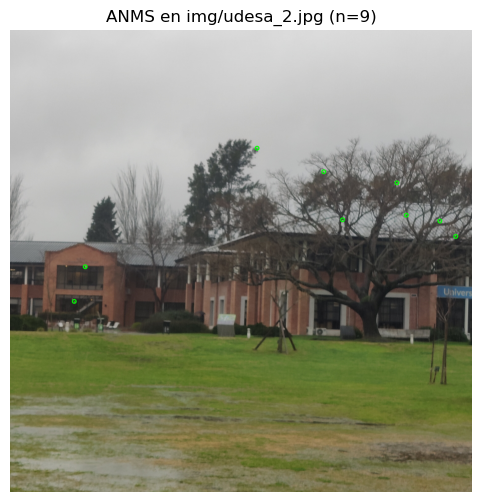

[img/udesa_2.jpg] antes=13  después(ANMS)=9  (N_target=9)


In [40]:
all_kps_anmsUH = {}
all_desc_anmsUH = {}

for path, data in corners_storeUH.items():
    img       = data["img"]
    coords    = data["coords"]
    responses = data["responses"]

    n0 = len(coords)
    N_target = int(0.7 * len(coords)) 
    keep_idx, _ = anms_from_coords(coords, responses, N=N_target, strength_ratio=1.2)
    coords_anms = coords[keep_idx]

    show_points_overlay(img, coords_anms, f"ANMS en {path}")
    print(f"[{path}] antes={n0}  después(ANMS)={len(coords_anms)}  (N_target={N_target})")

    kps_anms, desc_anms = describe_orb_on_points(img, coords_anms, nfeatures=2000)
    all_kps_anmsUH[path]  = kps_anms
    all_desc_anmsUH[path] = desc_anms


[img/udesa_0.jpg] SIFT antes=3520  después(ANMS)=2464  (N_target=2464, c=1.1)  desc=(2464, 128)


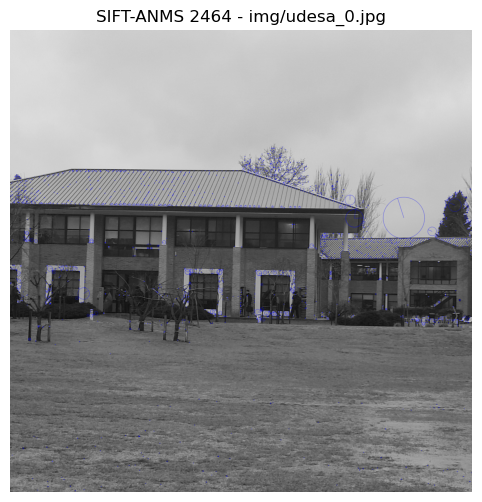

[img/udesa_1.jpg] SIFT antes=2396  después(ANMS)=1677  (N_target=1677, c=1.1)  desc=(1677, 128)


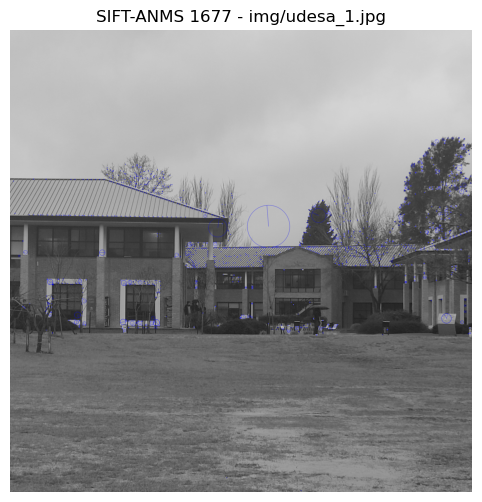

[img/udesa_2.jpg] SIFT antes=297  después(ANMS)=297  (N_target=300, c=1.1)  desc=(297, 128)


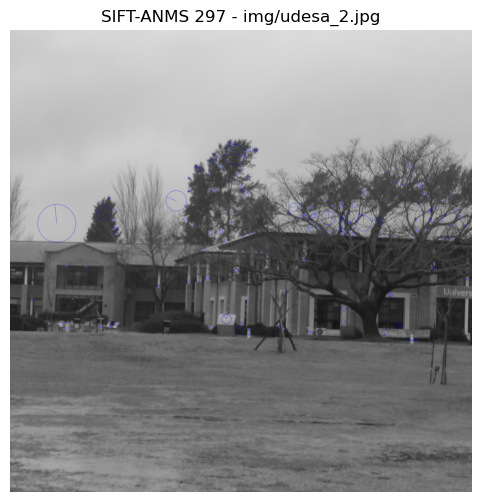

In [41]:
all_kps_anmsUSF, all_desc_anmsUSF = run_anms_sift(
    corners_storeUSF, keep_frac=0.7, min_keep=300, strength_ratio=1.1, show=True
)

## 3.3 - Asociación de características 